# Logistic Regression

## Cost function for logistic regression

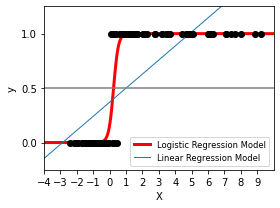

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

# General a toy dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]# 모든 행에서 1열 값을 가져오고(행이됨), 축을 추가한다(열이됨)


# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5, solver='liblinear')
#scikit-learn 패키지의 LogisticRegression 클래스를 이용하여 모델을 구현할 수 있으며,“liblinear”, “newton-cg”, “lbfgs”, “sag” ,“saga”  5개의 solver로 구성된다. 

clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))


loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()

-Fit θ parameters

Define the optimization object for the cost function we use the fit the parameters

Training set of m training examples

Each example has is n+1 length column vector

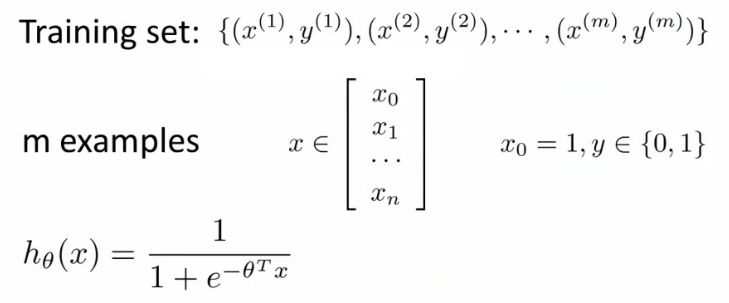


이는 지금까지 공부해온 내용입니다. 

자료 묶음(Data set, Training set)은 (x, y)로 표현 가능하고 x는 벡터형식으로 표현 가능합니다. 

x0는 1이라는 사실 역시 이미 공부했으며 x는 결국 n+1 차원의 벡터가 됩니다.

-This is the situation

Set of m training examples

Each example is a feature vector which is n+1 dimensional

x0 = 1

y ∈ {0,1}

Hypothesis is based on parameters (θ)

Given the training set how to we chose/fit θ?

Linear regression uses the following function to determine θ

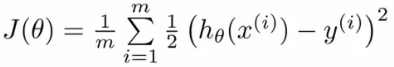

We can redefine J(θ) as

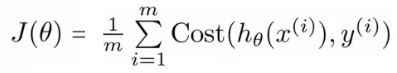

To further simplify it we can get rid of the superscripts

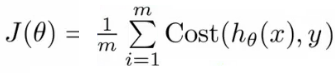

-cost(hθ(xi)hθ(xi)에 , y) = 1/2(hθ(xi) - yi)^2
hθ(xi)에 1/(1 + e^(-θTx)) 대입하면
logsitic regression 의 cost function은 non-convex function이 됩니다.

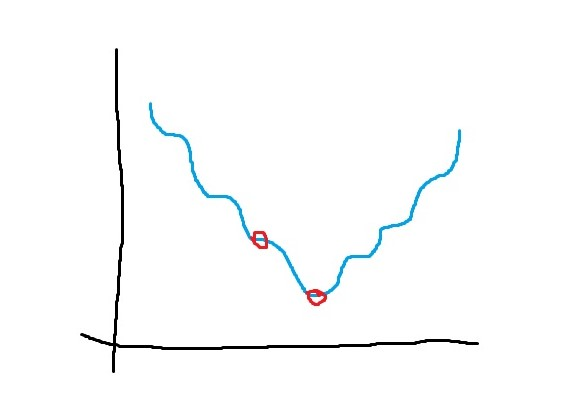

![image.png](attachment:image.png)

그러나 non-convex function이 되면 전체의 최소점을 찾기가 어렵습니다.

-문제를 해결하기 위해 우리는 로지스틱 회귀분석의 비용함수를 위와 같이 정의할 것입니다. 

즉 y = 1일때는 -log(hθ(x)) 함수를, y = 0일 때는  -log(1-hθ(x)) 함수를 사용할 것입니다.

This is our logistic regression cost function

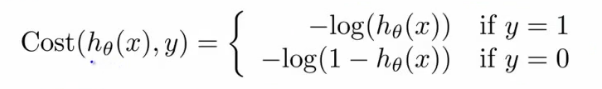

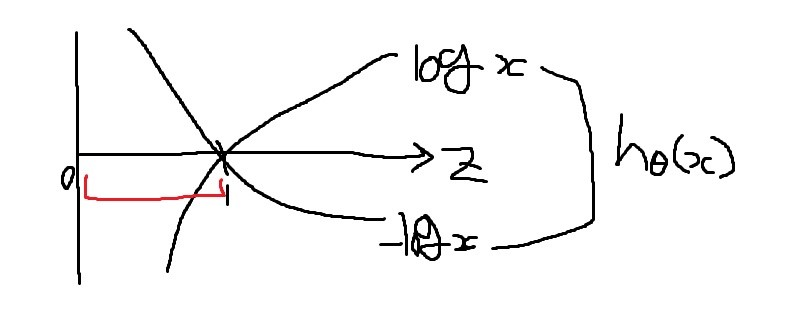

0<hθ(x)<1 을 가정하므로 표시한 부분만 사용합니다. 

[즉 y=1일때는]

Plot y = 1

So hθ(x) evaluates as -log(hθ(x))

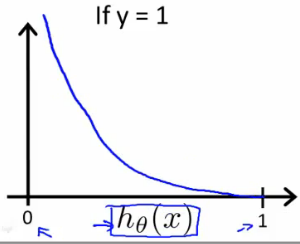

So when we're right, cost function is 0

Else it slowly increases cost function as we become "more" wrong

X axis is what we predict

Y axis is the cost associated with that prediction

This cost functions has some interesting properties

If y = 1 and hθ(x) = 1

If hypothesis predicts exactly 1 and thats exactly correct then that corresponds to 0 (exactly, not nearly 0)

As hθ(x) goes to 0

Cost goes to infinity

This captures the intuition that if hθ(x) = 0 (predict P (y=1|x; θ) = 0) but y = 1 this will penalize the learning algorithm with a 
massive cost

[y = 0 일때]

What about if y = 0

then cost is evaluated as -log(1- hθ( x ))

Just get inverse of the other function

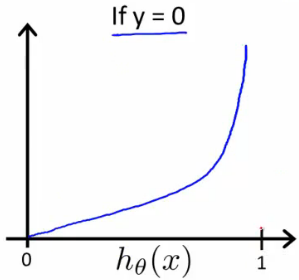

Now it goes to plus infinity as hθ(x) goes to 1

With our particular cost functions J(θ) is going to be convex and avoid local minimum

## Simplified cost function and gradient descent

Define a simpler way to write the cost function and apply gradient descent to the logistic regression

- By the end should be able to implement a fully functional logistic regression function

Logistic regression cost function is as follows

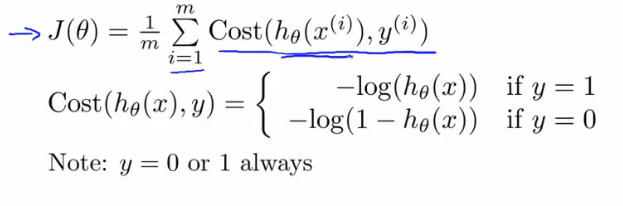

This is the cost for a single example

- For binary classification problems y is always 0 or 1

-  Because of this, we can have a simpler way to write the cost function

-  Rather than writing cost function on two lines/two cases

-  Can compress them into one equation - more efficient 

Can write cost function is

- cost(hθ, (x),y) = -ylog( hθ(x) ) - (1-y)log( 1- hθ(x) ) 

-  This equation is a more compact of the two cases above

We know that there are only two possible cases

- y = 1

Then our equation simplifies to

-log(hθ(x)) - (0)log(1 - hθ(x))

-log(hθ(x))

Which is what we had before when y = 1

- y = 0

Then our equation simplifies to

-(0)log(hθ(x)) - (1)log(1 - hθ(x))

= -log(1- hθ(x))

Which is what we had before when y = 0

Clever!

-So, in summary, our cost function for the θ parameters can be defined as

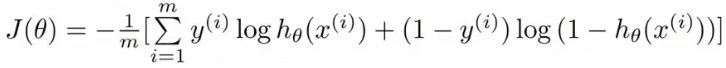

Why do we chose this function when other cost functions exist?
- This cost function can be derived from statistics using the principle of maximum likelihood estimation
- Note this does mean there's an underlying Gaussian assumption relating to the distribution of features 
- Also has the nice property that it's convex

To fit parameters θ:
- Find parameters θ which minimize J(θ)
- This means we have a set of parameters to use in our model for future predictions

Then, if we're given some new example with set of features x, we can take the θ which we generated, and output our prediction using

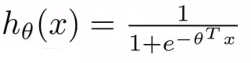

This result is
- p(y=1 | x ; θ)
- Probability y = 1, given x, parameterized by θ


### How to minimize the logistic regression cost function

Now we need to figure out how to minimize J(θ)
- Use gradient descent as before
- Repeatedly update each parameter using a learning rate

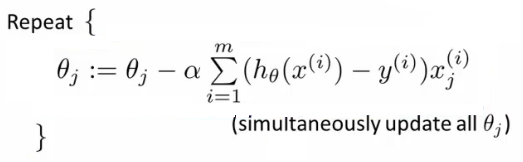

If you had n features, you would have an n+1 column vector for θ

This equation is the same as the linear regression rule
- The only difference is that our definition for the hypothesis has changed

Previously, we spoke about how to monitor gradient descent to check it's working
- Can do the same thing here for logistic regression

When implementing logistic regression with gradient descent, we have to update all the θ values (θ0 to θn) simultaneously
- Could use a for loop
- Better would be a vectorized implementation

선형회귀분석과 마찬가지로 모든 θj에 동시에 경사하강법을 활용해야 하므로 θ를 벡터로 표현하여 풀면됩니다.

Feature scaling for gradient descent for logistic regression also applies here

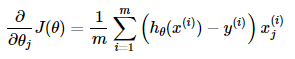

linear regression의 gradient descent와 동일합니다. 유일한 차이점은 hypothesis function이 hθ(x)=1/1+exp(−θTx) 로 바뀐 것입니다.

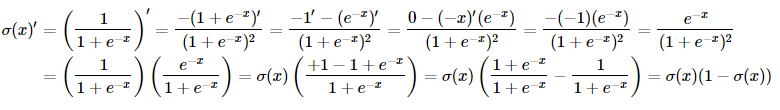

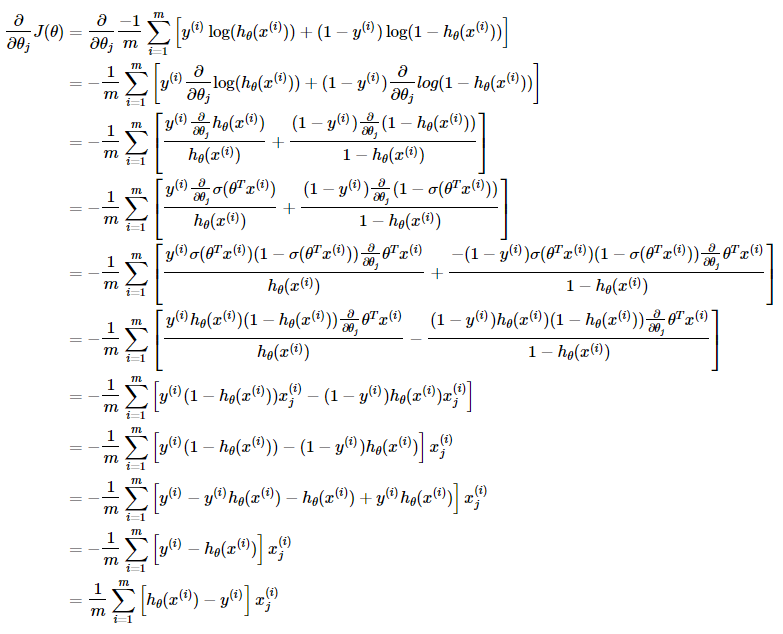

##  Logistic Regression using Gradient Descent

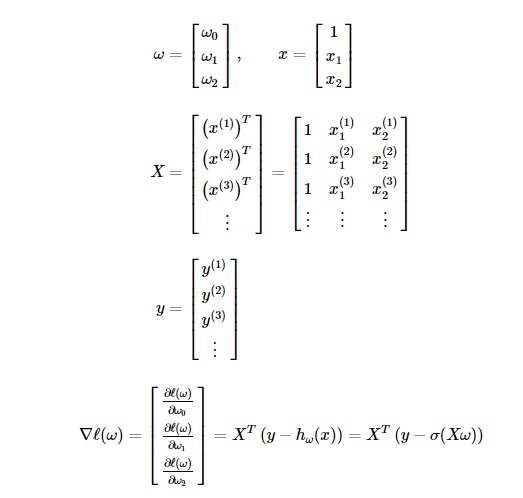

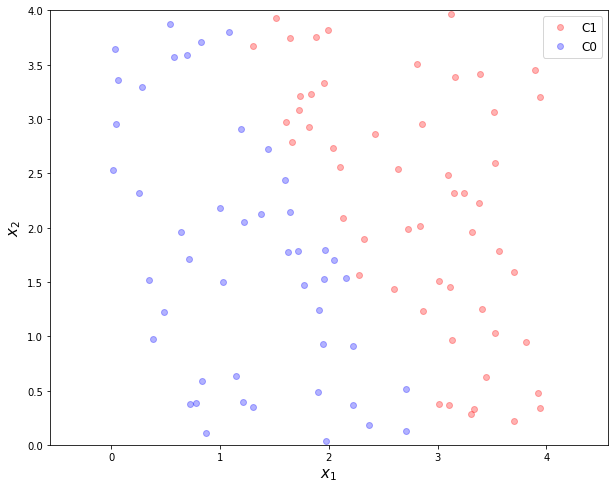

[[-35.13704021]
 [ 11.56977079]
 [  5.93209405]]


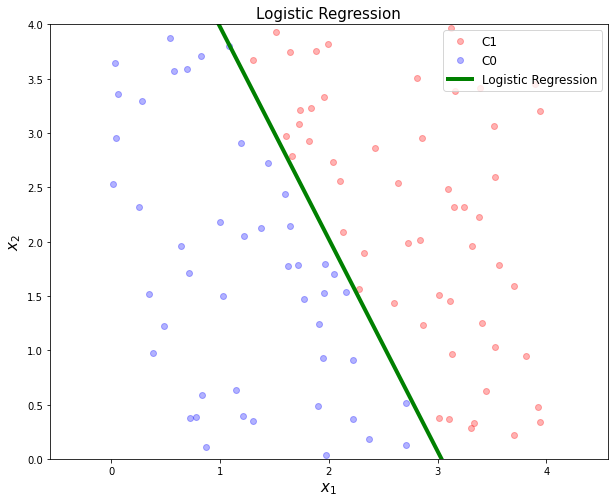

In [2]:
# datat generation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m = 100
w = np.array([[-6], [2], [1]])
X = np.hstack([np.ones([m,1]), 4*np.random.rand(m,1), 4*np.random.rand(m,1)])

w = np.asmatrix(w)
X = np.asmatrix(X)

y = 1/(1 + np.exp(-X*w)) > 0.5 

C1 = np.where(y == True)[0]
C0 = np.where(y == False)[0]

y = np.empty([m,1])
y[C1] = 1
y[C0] = 0

plt.figure(figsize = (10,8))
plt.plot(X[C1,1], X[C1,2], 'ro', alpha = 0.3, label = 'C1')
plt.plot(X[C0,1], X[C0,2], 'bo', alpha = 0.3, label = 'C0')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

# be careful with matrix shape

def h(x,w):
    return 1/(1 + np.exp(-x*w))

w = np.zeros([3,1])

alpha = 0.01

for i in range(10000):   
    df = -X.T*(y - h(X,w))
    w = w - alpha*df

print(w)


xp = np.linspace(0,4,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize = (10,8))
plt.plot(X[C1,1], X[C1,2], 'ro', alpha = 0.3, label = 'C1')
plt.plot(X[C0,1], X[C0,2], 'bo', alpha = 0.3, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()



##  Logistic Regression using Scikit-Learn

C:\Users\tmax\Anaconda3\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


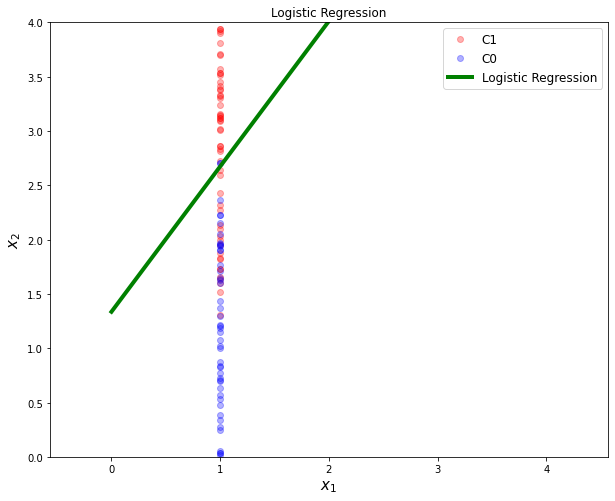

In [3]:

#X = X[:,1:3]

#X.shape



from sklearn import linear_model

clf = linear_model.LogisticRegression(solver='liblinear')
clf.fit(X,np.ravel(y))

clf.coef_

clf.intercept_

w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]

xp = np.linspace(0,4,100).reshape(-1,1)
yp = - w1/w2*xp - w0/w2

plt.figure(figsize = (10,8))
plt.plot(X[C1,0], X[C1,1], 'ro', alpha = 0.3, label = 'C1')
plt.plot(X[C0,0], X[C0,1], 'bo', alpha = 0.3, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

## Advanced optimization

Previously we looked at gradient descent for minimizing the cost function

Here look at advanced concepts for minimizing the cost function for logistic regression
- Good for large machine learning problems (e.g. huge feature set)

What is gradient descent actually doing?
- We have some cost function J(θ), and we want to minimize it
- We need to write code which can take θ as input and compute the following
-  J(θ)
-  Partial derivative if J(θ) with respect to j (where j=0 to j = n)

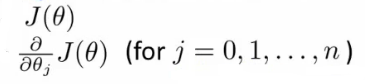

Given code that can do these two things
- Gradient descent repeatedly does the following update

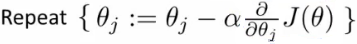

So update each j in θ sequentially

So, we must;
- Supply code to compute J(θ) and the derivatives
- Then plug these values into gradient descent

Alternatively, instead of gradient descent to minimize the cost function we could use
- Conjugate gradient
- BFGS (Broyden-Fletcher-Goldfarb-Shanno)
- L-BFGS (Limited memory - BFGS)

These are more optimized algorithms which take that same input and minimize the cost function

These are very complicated algorithms

Some properties

[Advantages]
- No need to manually pick alpha (learning rate)
- Have a clever inner loop (line search algorithm) which tries a bunch of alpha values and picks a good one
- Often faster than gradient descent
- Do more than just pick a good learning rate
- Can be used successfully without understanding their complexity

[Disadvantages]
- Could make debugging more difficult
- Should not be implemented themselves
- Different libraries may use different implementations - may hit performance

### Using advanced cost minimization algorithms

How to use algorithms
 
Say we have the following example

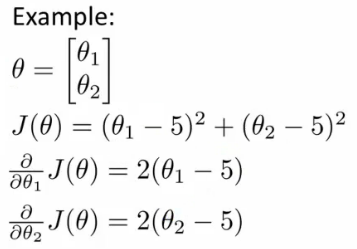

Example above
- θ1 and θ2 (two parameters)
- Cost function here is J(θ) = (θ1 - 5)2 + ( θ2 - 5)2
- The derivatives of the J(θ) with respect to either θ1 and θ2 turns out to be the 2(θi - 5)

First we need to define our cost function, which should have the following signature

> function [jval, gradent] = costFunction(THETA)

Input for the cost function is THETA, which is a vector of the θ parameters

Two return values from costFunction are
- jval
- How we compute the cost function θ (the underived cost function) 
- In this case = (θ1 - 5)2 + (θ2 - 5)2

- gradient
- 2 by 1 vector
- 2 elements are the two partial derivative terms
- i.e. this is an n-dimensional vector
- Each indexed value gives the partial derivatives for the partial derivative of J(θ) with respect to θi
- Where i is the index position in the gradient vector 

With the cost function implemented, we can call the advanced algorithm using

> options= optimset('GradObj', 'on', 'MaxIter', '100'); % define the options data structure

> initialTheta= zeros(2,1); # set the initial dimensions for theta % initialize the theta values

> [optTheta, funtionVal, exitFlag]= fminunc(@costFunction, initialTheta, options); % run the algorithm

Here
- options is a data structure giving options for the algorithm
- fminunc
- function minimize the cost function (find minimum of unconstrained multivariable function)
- @costFunction is a pointer to the costFunction function to be used

For the octave implementation
- initialTheta must be a matrix of at least two dimensions 

How do we apply this to logistic regression?
- Here we have a vector 

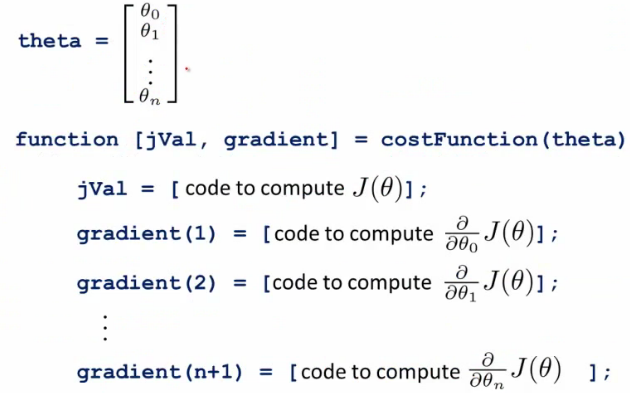

Here
- theta is a n+1 dimensional column vector
- Octave indexes from 1, not 0

Write a cost function which captures the cost function for logistic regression

## Multiclass classification problems

Getting logistic regression for multiclass classification using one vs. all

Multiclass - more than yes or no (1 or 0)
- Classification with multiple classes for assignment

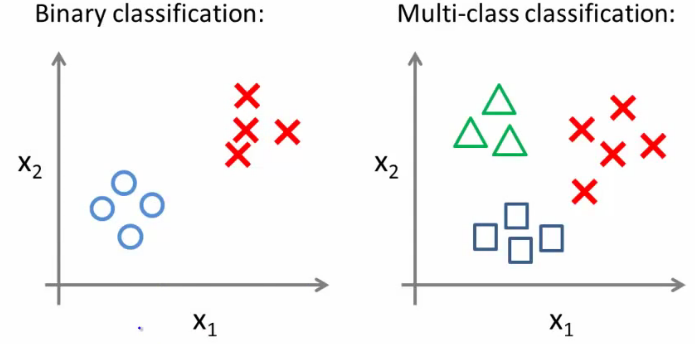

Given a dataset with three classes, how do we get a learning algorithm to work?
- Use one vs. all classification make binary classification work for multiclass classification



One vs. all classification
- Split the training set into three separate binary classification problems
- i.e. create a new fake training set
- 각 class 별로 해당 class vs 나머지 class로 binary decision을 내리도록 만들고 hypothesis function 값이 가장 큰 것을 고르는 것입니다.

-Triangle (1) vs crosses and squares (0) hθ1(x)

- [P(y=1 | x1; θ)]

-Crosses (1) vs triangle and square (0) hθ2(x)

- [P(y=1 | x2; θ)]

-Square (1) vs crosses and square (0) hθ3(x)

- [P(y=1 | x3; θ)]

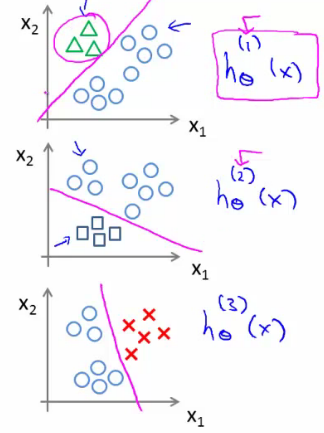

이렇게 하면 각 class마다 hypothesis function을 train할 수 있습니다. 그런데 hypothesis function이 내보내는 값은 '주어진 x 가 class 1에 들어갈 확률'로서 해석됩니다. 따라서, hypothesis function 출력이 가장 크다는 것은 그 class에 들어갈 확률이 가장 크다는 뜻입니다.

Overall
- Train a logistic regression classifier hθ(i)(x) for each class i to predict the probability that y = i
- On a new input, x to make a prediction, pick the class i that maximizes the probability that hθ(i)(x) = 1 

## Multiclass classification in python 

C:\Users\tmax\AppData\Local\Temp/ipykernel_9080/2585690096.py:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


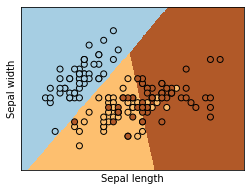

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()